In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
#data=nc.Dataset('/ihesp/archive/Sunway_Runs/HR_HF_TNST/B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.HMXL.185001.210012.nc')
data=nc.Dataset('/scratch/user/xiliangdiao/Low/B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.HMXL.185001.210012.nc')
#plotvar2 = data.variables['HMXL'][1880:3012:12,248:344,600:1400]
plotvar2 = data.variables['HMXL'][1880:3012:12,247:365,600:1400]

In [3]:
plotvar2.max()

356311.06

In [4]:
aveplot = np.nanmean(plotvar2, axis=1)

In [5]:
result = np.zeros((95,800))

In [6]:
aveplot.max()

218347.14

In [7]:
A = np.arange(95)
B = np.arange(800)
xx, yy = np.meshgrid(B, A)

In [8]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([130,150,160,170,190,200,210,220,230,245]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,200,300,400,500,600,800,1000,1200,1500]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


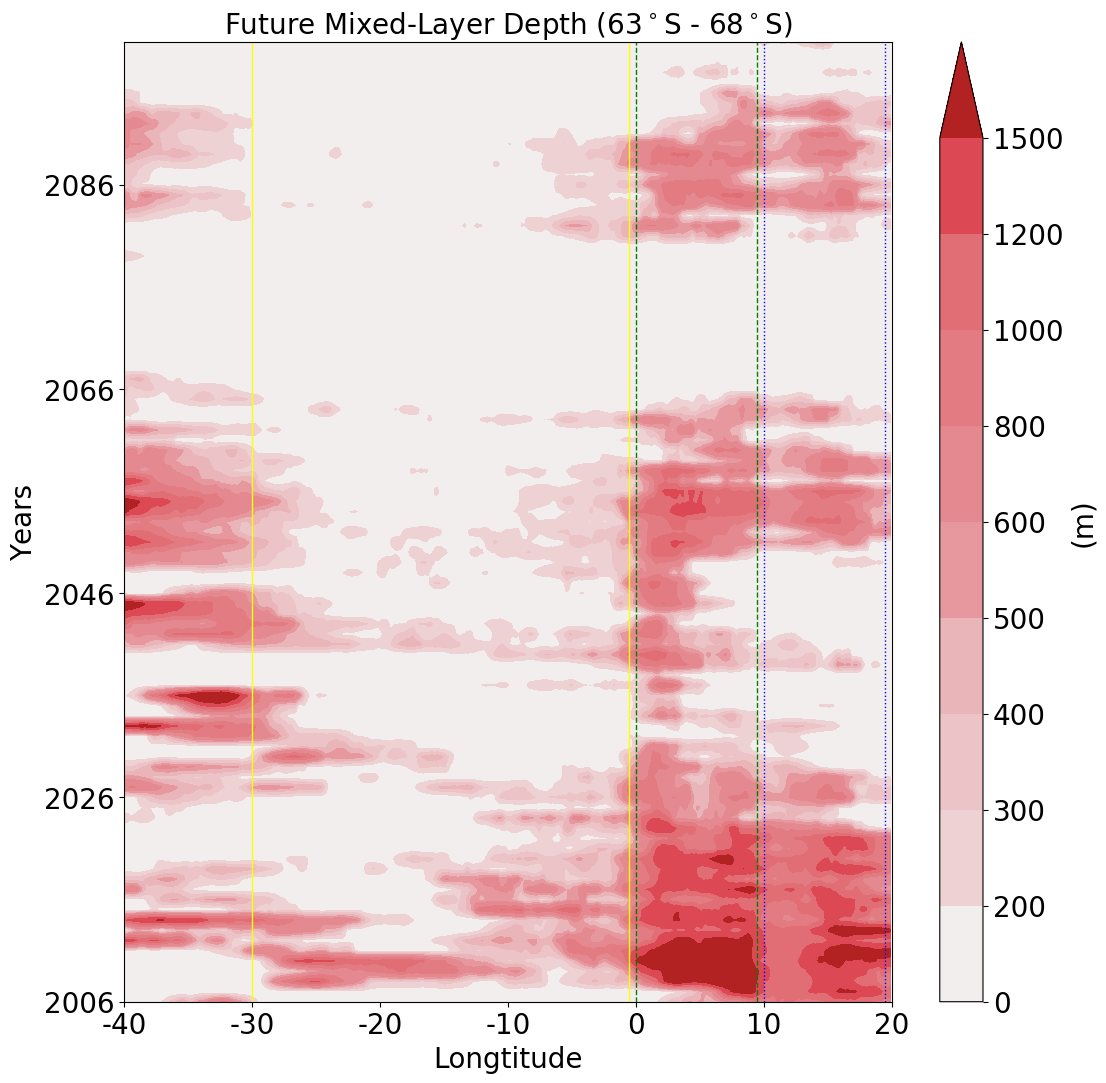

In [9]:
# plot the result
fig = plt.figure(figsize=(12, 12),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx[:,100:700], yy[:,100:700], aveplot[:,100:700]/100, cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')
im.cmap.set_over('firebrick')
cbar = fig.colorbar(im, ax=ax0,extendfrac='auto',ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(m)', **my_font)
ax0.set_title('Mixed Layer Depth')
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
###plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")
plt.vlines(200, 0, 94, colors = "yellow",linestyles = "solid",linewidth=1)
plt.vlines(495, 0, 94, colors = "yellow",linestyles = "solid",linewidth=1)


plt.vlines(500, 0, 94, colors = "green",linestyles = "dashed",linewidth=1)
plt.vlines(595, 0, 94, colors = "green",linestyles = "dashed",linewidth=1)

plt.vlines(600, 0, 94, colors = "blue",linestyles = "dotted",linewidth=1)
plt.vlines(695, 0, 94, colors = "blue",linestyles = "dotted",linewidth=1)


#plt.vlines(700, 0, 94, colors = "purple",linestyles = 'dashdot',linewidth=1)
#plt.vlines(795, 0, 94, colors = "purple",linestyles = "dashdot",linewidth=1)
#############################################################################
##设定X坐标值
#plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)

plt.xticks(range(100,701,100), ['-40','-30','-20','-10', '0', '10', '20'],**my_font)
plt.yticks(range(0,95,20), ['2006', '2026','2046', '2066','2086'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
#ax0.set_title('Mix Layer Depth (64$^\circ$S - 68$^\circ$S)',**my_font)
ax0.set_title('Future Mixed-Layer Depth (63$^\circ$S - 68$^\circ$S)',**my_font)
plt.savefig("mxld250.png",bbox_inches='tight',dpi=fig.dpi)

In [10]:
#ii = 0
#for i in nu:
    #result[ii] = aveplot[i,:]
    #result[ii+1] = aveplot[i+1,:]
    #result[ii+2] = aveplot[i+2,:]
    #result[ii+3] = aveplot[i+3,:]
    #ii = ii +4

In [11]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([130,150,160,170,180,190,200,210,220,230,280]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,200,300,400,500,600,700,800,900,1000,1100,1200]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

In [12]:
mixplot = np.loadtxt("mixplot.out")

In [13]:
mixplot.shape

(350, 600)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'spacing'
  if sys.path[0] == '':
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: The following kwargs were not used by contour: 'spacing'


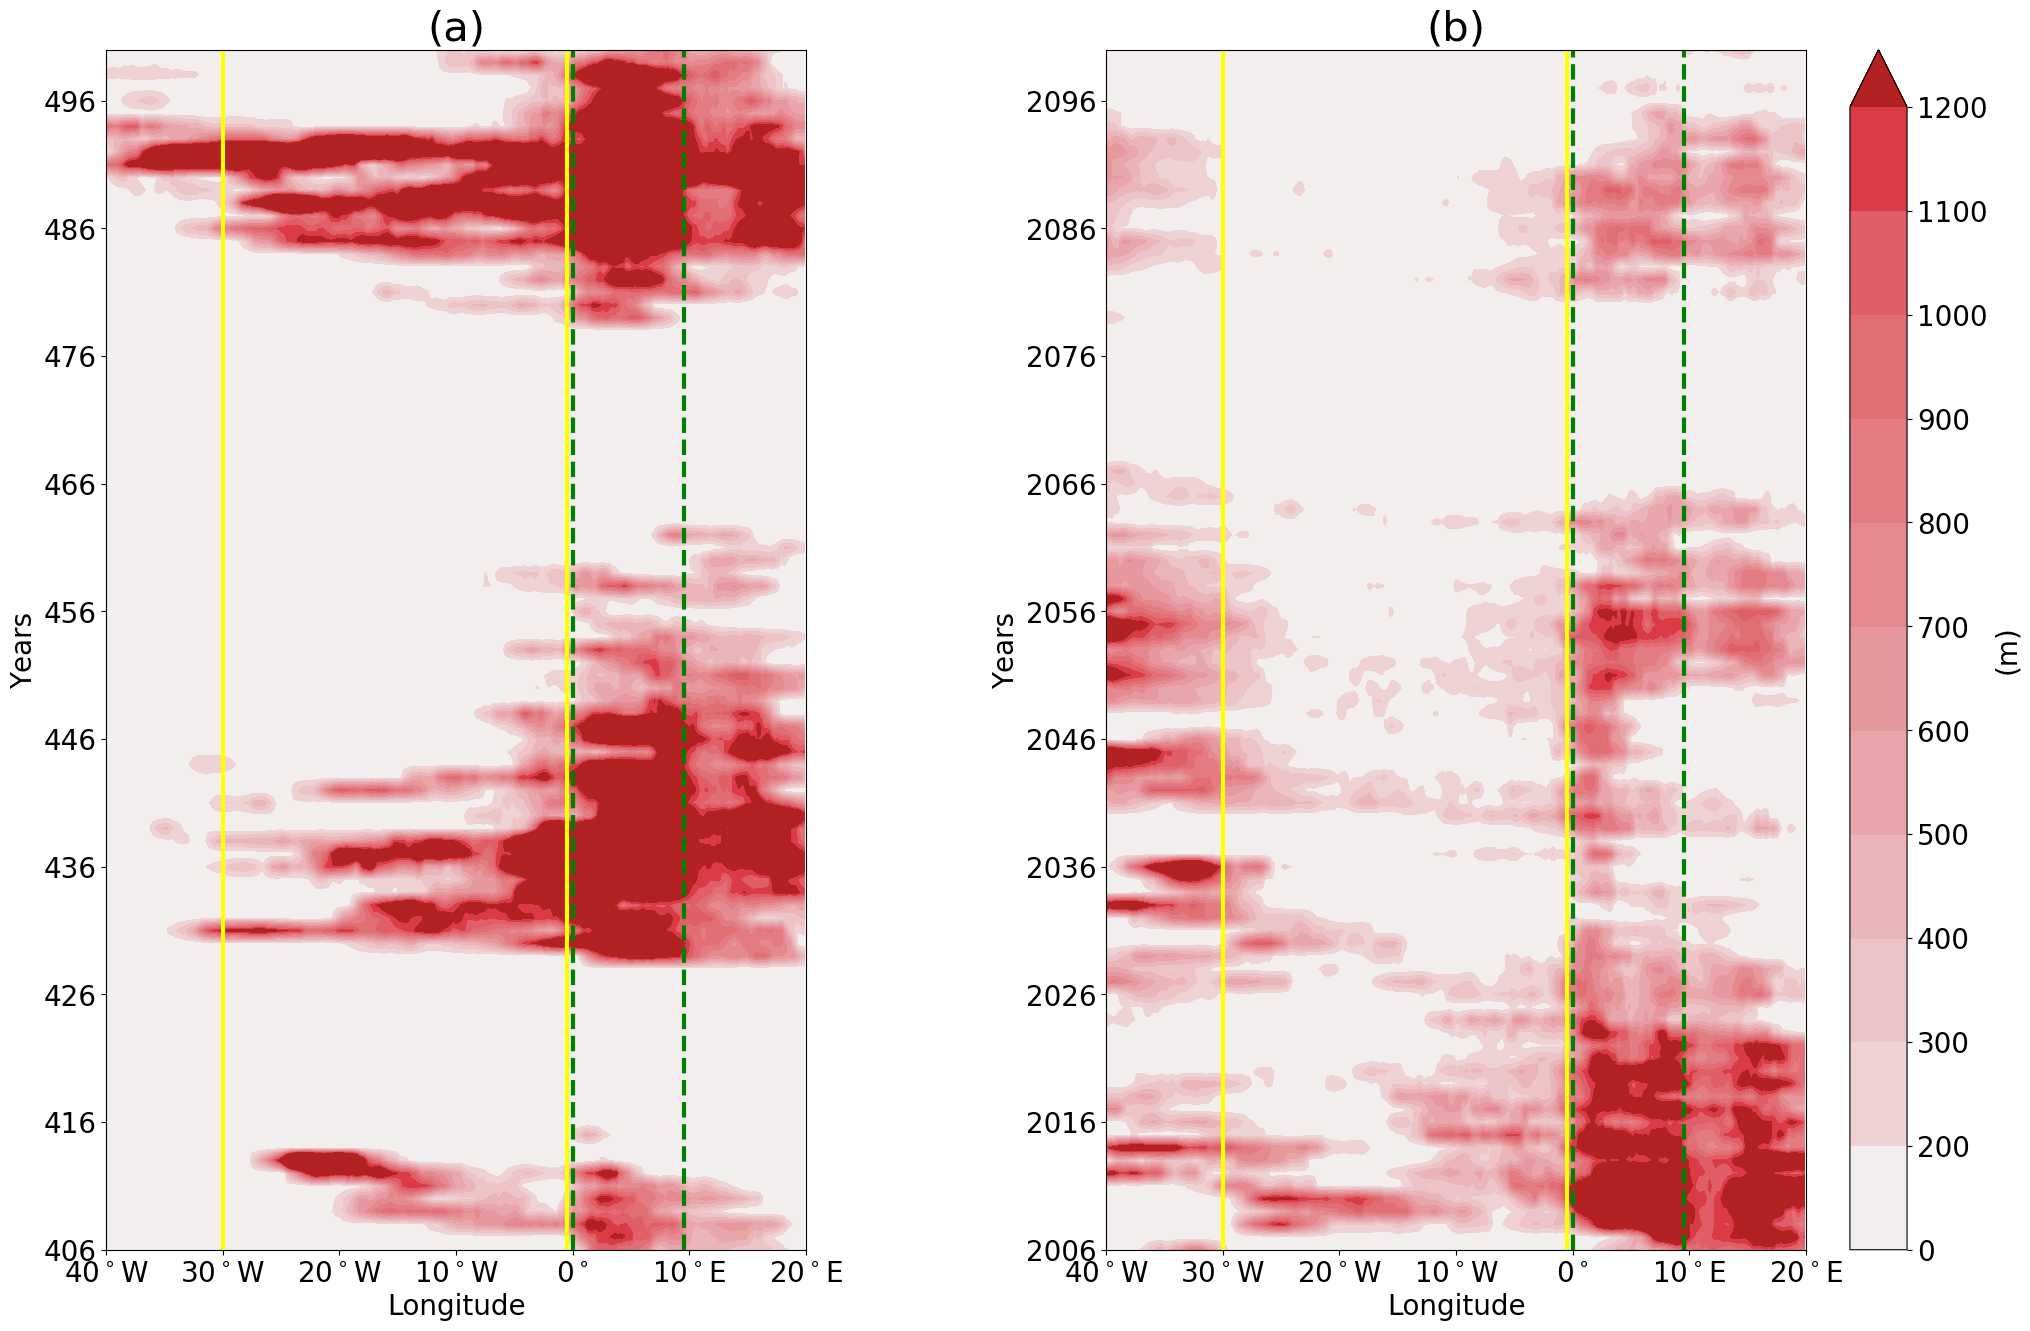

In [15]:
# plot the result
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(25,15), dpi=100)
################################################################
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.8],
                    xticklabels=[])

#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax1.contourf(xx[:,100:700], yy[:,100:700], mixplot[255:350,:]/100,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')

im.cmap.set_over('firebrick')
#im.cmap.set_under('darkblue')
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax1,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.remove()

plt.vlines(200, 0, 94, colors = "yellow",linestyles = "solid",linewidth=3)
plt.vlines(495, 0, 94, colors = "yellow",linestyles = "solid",linewidth=3)


plt.vlines(500, 0, 94, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(595, 0, 94, colors = "green",linestyles = "dashed",linewidth=3)

#plt.vlines(600, 0, 94, colors = "blue",linestyles = "dotted",linewidth=3)
#plt.vlines(695, 0, 94, colors = "blue",linestyles = "dotted",linewidth=3)

plt.xticks(range(100,701,100), ['40$^\circ$W','30$^\circ$W','20$^\circ$W','10$^\circ$W', '0$^\circ$', '10$^\circ$E', '20$^\circ$E'],**my_font)
plt.yticks(range(0,96,10), ['406', '416','426','436', '446','456', '466','476', '486','496'],**my_font)
#plt.yticks(range(0,351,50), ['150','200', '250','300', '350','400','450','500'],**my_font)
plt.xlabel('Longitude',**my_font)
plt.ylabel('Years',**my_font)
ax1.set_title('(a)',fontsize = 30)

ax2 = fig.add_axes([0.5, 0.1, 0.35, 0.8],
                    xticklabels=[])

im = ax2.contourf(xx[:,100:700], yy[:,100:700], aveplot[:,100:700]/100,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')

im.cmap.set_over('firebrick')

cbar = fig.colorbar(im, ax=ax2,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(m)', **my_font)

plt.vlines(200, 0, 94, colors = "yellow",linestyles = "solid",linewidth=3)
plt.vlines(495, 0, 94, colors = "yellow",linestyles = "solid",linewidth=3)


plt.vlines(500, 0, 94, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(595, 0, 94, colors = "green",linestyles = "dashed",linewidth=3)

#plt.vlines(600, 0, 94, colors = "blue",linestyles = "dotted",linewidth=3)
#plt.vlines(695, 0, 94, colors = "blue",linestyles = "dotted",linewidth=3)


plt.xticks(range(100,701,100), ['40$^\circ$W','30$^\circ$W','20$^\circ$W','10$^\circ$W', '0$^\circ$', '10$^\circ$E', '20$^\circ$E'],**my_font)
plt.yticks(range(0,96,10), ['2006', '2016','2026','2036', '2046','2056', '2066','2076', '2086','2096'],**my_font)
#plt.yticks(range(0,181,10), ['150','160','170',\
                             #'180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
#plt.yticks(range(100,351,50), ['250(1850)','300(1900)', '350(1950)','400(2000)','450(2050)','500(2100)'],**my_font)
plt.xlabel('Longitude',**my_font)
plt.ylabel('Years',**my_font)
ax2.set_title('(b)',fontsize = 30)
plt.savefig("fumix.png",bbox_inches='tight',dpi=fig.dpi)